# CIFAR-10 Luokittelua Fully-Connected Neuroverkolla

CIFAR-10 datasetti koostuu 60.000 32x32 kuvasta, jotka esittävät 10 eri aihetta.

## Setup
Ensimmäisessä solussa aloitamme asettamalla Kerasille yhteyden Tensorflowiin, sekä tuomme tarvittavat kirjastot

In [49]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K
print(K.backend())

tensorflow


## Mallin arkkitehtuuri
Mallimme koostuu neuroverkosta, jossa on:
- Syötekerros, joka ottaa vastaan 3072 litistettyä piirrettä (32x32x3 kuvat)
- Kolme täysin yhdistettyä piilokerrosta ReLU-aktivaatiolla
- Dropout-kerroksia jokaisen piilokerroksen jälkeen
- Tuloskerros softmax-aktivaatiolla 10 luokan luokittelua varten

## Koulutusprosessi
Malli koulutetaan seuraavilla asetuksilla:
- Adam-optimoija, jolle säädetty oppimisnopeus
- Early stopping ylisovittamisen estämiseksi
- Validointi 20% osuudella harjoitusdatasta

Seuraava solu lataa CIFAR-10 datan, rakentaa mallin arkkitehtuurin ja kouluttaa sen luokittelemaan näitä kuvia.

In [61]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train_org = x_train
x_test_org = x_test
x_train = x_train.reshape(50000, 3072).astype('float32') / 255
x_test = x_test.reshape(10000, 3072).astype('float32') / 255

inputs = keras.Input(shape=(3072,))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='cifar10_model')
model.summary()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20,
    min_delta=0.001,
    restore_best_weights=True
    )


history = model.fit(x_train, y_train, 
                    epochs=500,
                    batch_size=256, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2201 - loss: 2.1165 - val_accuracy: 0.3373 - val_loss: 1.8373
Epoch 2/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3388 - loss: 1.8310 - val_accuracy: 0.3810 - val_loss: 1.7289
Epoch 3/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3770 - loss: 1.7381 - val_accuracy: 0.4146 - val_loss: 1.6731
Epoch 4/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3944 - loss: 1.6919 - val_accuracy: 0.4286 - val_loss: 1.6259
Epoch 5/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4094 - loss: 1.6526 - val_accuracy: 0.4307 - val_loss: 1.6034
Epoch 6/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4218 - loss: 1.6247 - val_accuracy: 0.4358 - val_loss: 1.5779
Epoch 7/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4242 - loss: 1.6064 - val_accuracy: 0.4363 - val_loss: 1.5897
Epoch 8/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4357 - loss: 1.5800 - val_accu

## Seuraavaksi hämmennysmatriisi ja lyhyt analyysi

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step


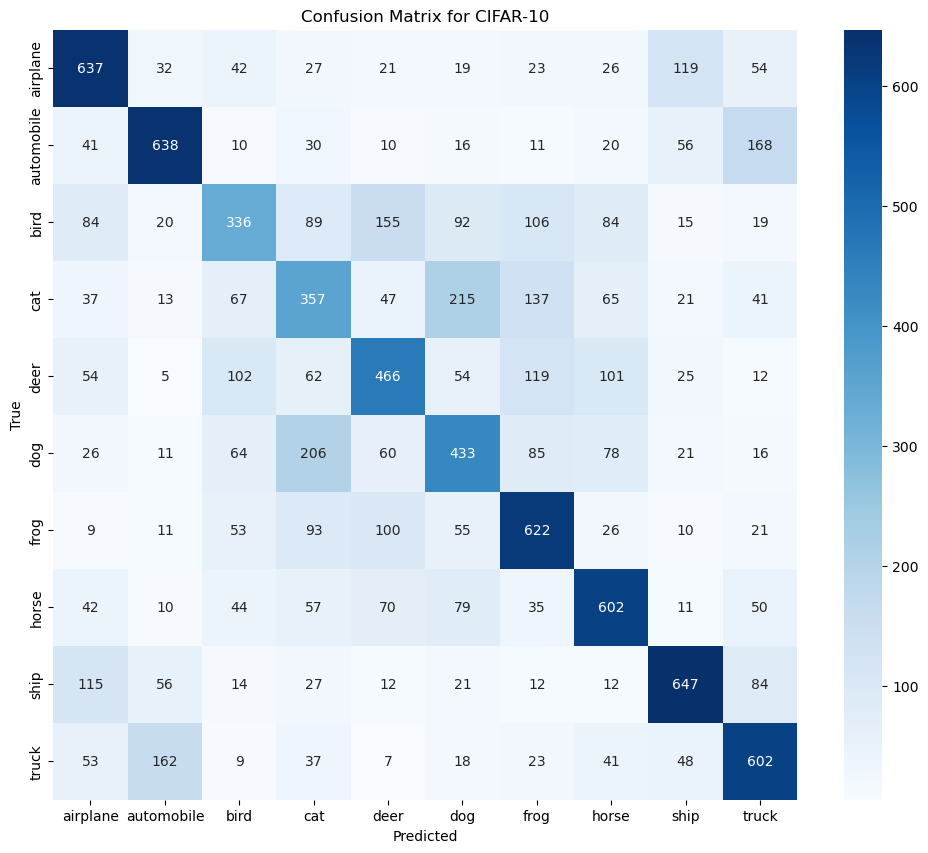

In [63]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test = y_test.reshape(-1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()

### Analyysi:
- Malli ei saavuttanut kovin korkeaa tarkkuutta, ja jäi melko epävarmaksi
- Mallilla on muutamia kuvia, jotka vaikuttavat sille vaikeiksi erottaa toisistaan
    1. Kissat ja Koirat menevät sekaisin
    2. Linnut ja Peurat sekä Sammakot
    3. Lentokoneet ja Laivat
    4. Autot ja Rekat